In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_city, plot_state_qsphere
#plot_state_city is for density matrix plot
#plot_state_qsphere used for multi qubit visualization
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

# NOT Gate

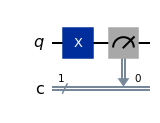

In [2]:
qc_not = QuantumCircuit(1,1, name = "qc")
qc_not.x(0)
qc_not.measure(0,0)
qc_not.draw('mpl')

# QASM simulator


Quantum state is:  {'1': 1000}


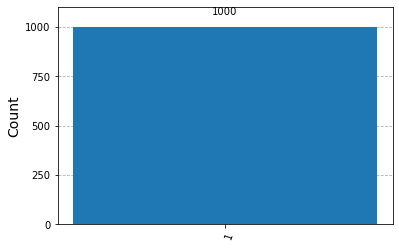

In [7]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
not_gate = transpile(qc_not, simulator_state)
job = simulator_state.run(not_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_not)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)

# AND gate

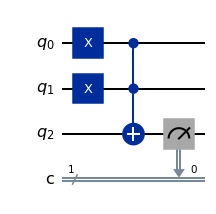

In [8]:
qc_and = QuantumCircuit(3,1, name = "qc") # 3 qubits and single classical bit
qc_and.x(0) # initiate state with |1>
qc_and.x(1) # initiate state with |1>
qc_and.ccx(0,1,2)
qc_and.measure(2,0) # we measure only the output qubit
qc_and.draw('mpl')

# QASM simulator


Quantum state is:  {'1': 1000}


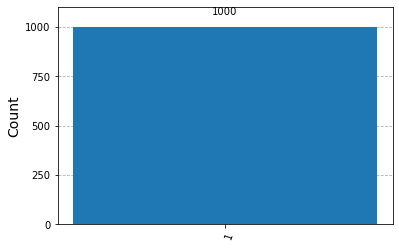

In [10]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
and_gate = transpile(qc_and, simulator_state)
job = simulator_state.run(and_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_and)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)

# OR Gate

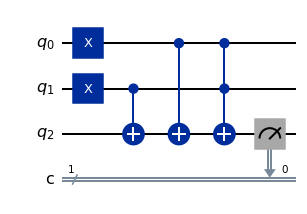

In [12]:
qc_or = QuantumCircuit(3,1, name = "qc") # 3 qubits and single classical bit
qc_or.x(0) # initiate state with |1>
qc_or.x(1) # initiate state with |1>
qc_or.cx(1,2) #This line applies a CNOT gate where qubit 1 is the control and qubit 2 is the target. This operation flips the state of qubit 2 if qubit 1 is ∣1⟩.
qc_or.cx(0,2) #This line applies a CNOT gate where qubit 0 is the control and qubit 2 is the target. This operation flips the state of qubit 2 if qubit 0 is ∣1⟩.
qc_or.ccx(0,1,2) #This line applies a Toffoli gate (CCX gate) where qubits 0 and 1 are the control qubits, and qubit 2 is the target qubit. This gate performs a classical OR operation between qubits 0 and 1, storing the result in qubit 2.
qc_or.measure(2,0) # we measure only the output qubit.  This line measures qubit 2 and stores the measurement outcome (either ∣0⟩ or ∣1⟩) in the classical bit indexed by 0.
qc_or.draw('mpl')

# QASM simulator


Quantum state is:  {'1': 1000}


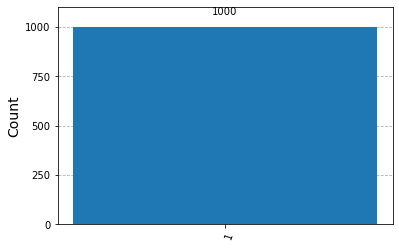

In [13]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
or_gate = transpile(qc_or, simulator_state)
job = simulator_state.run(or_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_or)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)

# XOR Gate

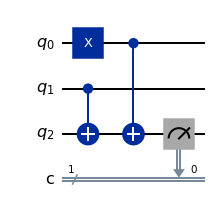

In [14]:
qc_xor = QuantumCircuit(3,1, name = "qc") # 3 qubits and single classical bit
qc_xor.x(0) # initiate state with |1>
#qc_xor.x(1) # initiate state with |1>
qc_xor.cx(1,2)
qc_xor.cx(0,2)
qc_xor.measure(2,0) # we measure only the output qubit
qc_xor.draw('mpl')

# QASM simulator


Quantum state is:  {'1': 1000}


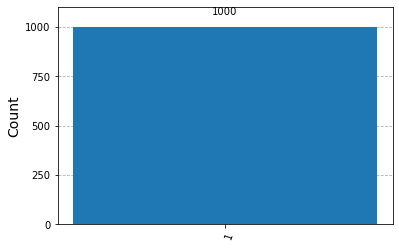

In [15]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
xor_gate = transpile(qc_xor, simulator_state)
job = simulator_state.run(xor_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_xor)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)

# NAND Gate

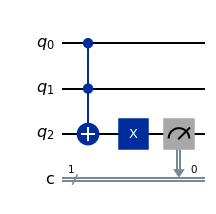

In [16]:
qc_nand = QuantumCircuit(3,1, name = "qc") # 3 qubits and single classical bit

qc_nand.ccx(0, 1,2)
qc_nand.x(2)

qc_nand.measure(2,0) # we measure only the output qubit

qc_nand.draw('mpl')

# QASM simulator


Quantum state is:  {'1': 1000}


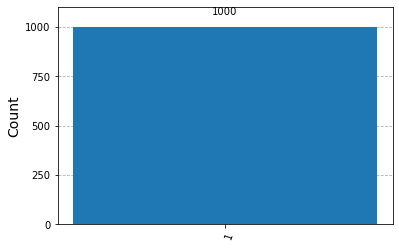

In [17]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
nand_gate = transpile(qc_nand, simulator_state)
job = simulator_state.run(nand_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_nand)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)

# Half Adder Circuit

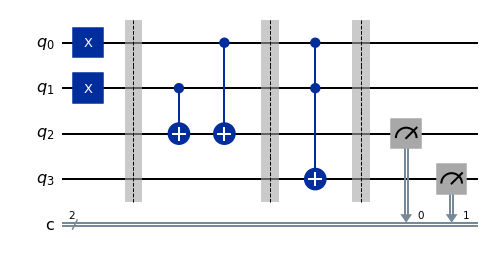

In [18]:
qc_ha = QuantumCircuit(4,2, name = "qc") # 4 qubits and 2 classical bits

# initialize qubits to |11>
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

#XOR
qc_ha.cx(1,2)
qc_ha.cx(0,2)
qc_ha.barrier()

#AND
qc_ha.ccx(0,1,3)
qc_ha.barrier()

#Sum
qc_ha.measure(2,0) 

#Carry out
qc_ha.measure(3,1)

qc_ha.draw('mpl')

# QASM simulator


Quantum state is:  {'10': 1000}


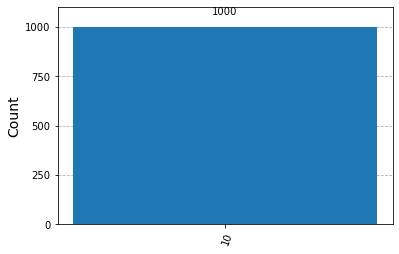

In [19]:
simulator_state = Aer.get_backend('qasm_simulator')

#execute the circuit
ha_gate = transpile(qc_ha, simulator_state)
job = simulator_state.run(ha_gate, shots = 1000)

#grab results from the job
result = job.result()

#returns counts
counts = result.get_counts(qc_ha)
print("\nQuantum state is: ", counts)

#plot a density matrix_plot
plot_histogram(counts)


## the result of |11> is |01> or |10> in qiskit language